# Iris Classifier Trainer

This Notebook trains a Scikit Learn and Keras model for classifying Iris species.

## Scikit Learn

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [144]:
import numpy as np
df = pd.read_csv("iris.csv")
target = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
x = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].to_numpy()
y = [target.index(row["Species"]) for index, row in df.iterrows()]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

from joblib import dump, load
dump(classifier, 'irisclassifier.joblib') 

['irisclassifier.joblib']

### Training Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<AxesSubplot:>

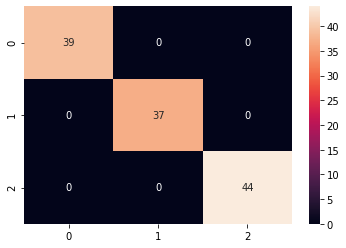

In [145]:
y_train_pred = classifier.predict(x_train)
print(classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)


### Test Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



<AxesSubplot:>

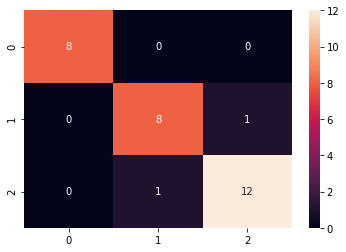

In [138]:
y_test_pred = classifier.predict(x_test)
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True)

## Keras

In [146]:
import tensorflow as tf
import numpy as np
df = pd.read_csv("iris.csv")
target = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
x = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].to_numpy()
y = np.array(
    [[1 if row["Species"]==target[0] else 0,
        1 if row["Species"]==target[1] else 0,
        1 if row["Species"]==target[2] else 0]
        for index, row in df.iterrows()])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.summary()

model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

model.save("irisclassifier.h5")

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [==============================] - 0s 42ms/step - loss: 2.7833 - accuracy: 0.3667 - val_loss: 3.4803 - val_accuracy: 0.2000
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 2.4667 - accuracy: 0.3667 - val_loss: 3.0870 - val_accuracy: 0.2000
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 2.2091 - accuracy: 0.3667 - val_loss: 2.7444 - val_accuracy: 0.2000
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 1.9721 - accuracy: 0.3667 - 

4/4 [==============================] - 0s 7ms/step - loss: 0.3643 - accuracy: 0.9500 - val_loss: 0.3949 - val_accuracy: 0.8667
Epoch 55/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3594 - accuracy: 0.9500 - val_loss: 0.3939 - val_accuracy: 0.8667
Epoch 56/200
4/4 [==============================] - 0s 8ms/step - loss: 0.3552 - accuracy: 0.9500 - val_loss: 0.3925 - val_accuracy: 0.8667
Epoch 57/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3532 - accuracy: 0.9500 - val_loss: 0.3967 - val_accuracy: 0.8000
Epoch 58/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3481 - accuracy: 0.9500 - val_loss: 0.3871 - val_accuracy: 0.8667
Epoch 59/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3439 - accuracy: 0.9500 - val_loss: 0.3800 - val_accuracy: 0.8667
Epoch 60/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3403 - accuracy: 0.9583 - val_loss: 0.3750 - val_accuracy: 0.8667
Epoch 61/200
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 0.1995 - accuracy: 0.9750 - val_loss: 0.2439 - val_accuracy: 0.9667
Epoch 113/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1982 - accuracy: 0.9667 - val_loss: 0.2453 - val_accuracy: 0.9667
Epoch 114/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1981 - accuracy: 0.9667 - val_loss: 0.2342 - val_accuracy: 1.0000
Epoch 115/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1940 - accuracy: 0.9750 - val_loss: 0.2367 - val_accuracy: 0.9667
Epoch 116/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1922 - accuracy: 0.9750 - val_loss: 0.2374 - val_accuracy: 0.9667
Epoch 117/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1908 - accuracy: 0.9750 - val_loss: 0.2351 - val_accuracy: 0.9667
Epoch 118/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1891 - accuracy: 0.9750 - val_loss: 0.2333 - val_accuracy: 0.9667
Epoch 119/200
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.1308 - accuracy: 0.9750 - val_loss: 0.1642 - val_accuracy: 1.0000
Epoch 171/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1304 - accuracy: 0.9750 - val_loss: 0.1613 - val_accuracy: 1.0000
Epoch 172/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1300 - accuracy: 0.9750 - val_loss: 0.1660 - val_accuracy: 1.0000
Epoch 173/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1301 - accuracy: 0.9750 - val_loss: 0.1666 - val_accuracy: 0.9667
Epoch 174/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1286 - accuracy: 0.9750 - val_loss: 0.1578 - val_accuracy: 1.0000
Epoch 175/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1274 - accuracy: 0.9750 - val_loss: 0.1552 - val_accuracy: 1.0000
Epoch 176/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1273 - accuracy: 0.9750 - val_loss: 0.1548 - val_accuracy: 1.0000
Epoch 177/200
4/4 [========

### Training Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.92      0.96        37
           2       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



<AxesSubplot:>

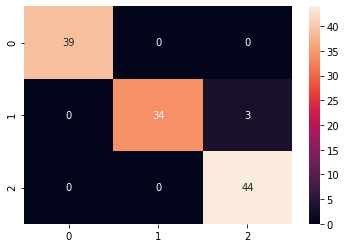

In [147]:
y_train_pred = model.predict(x_train)
print(classification_report([np.argmax(y) for y in y_train], 
                            [np.argmax(y) for y in y_train_pred]))
cm = confusion_matrix([np.argmax(y) for y in y_train], 
                      [np.argmax(y) for y in y_train_pred])
sns.heatmap(cm, annot=True)



### Test Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

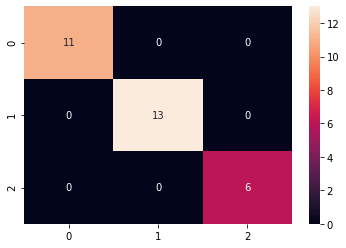

In [148]:
y_test_pred = model.predict(x_test)
print(classification_report([np.argmax(y) for y in y_test], 
                            [np.argmax(y) for y in y_test_pred]))
cm = confusion_matrix([np.argmax(y) for y in y_test], 
                      [np.argmax(y) for y in y_test_pred])
sns.heatmap(cm, annot=True)